## Task-4 DesicionTrees

Using the Decision Tree Classifier to classify the data in to groups and sub-groups with best possible accuracy

In [1]:
# Importing necessary libraries
import sklearn.datasets as datasets
import pandas as pd
import matplotlib.pyplot as plt
# Loading iris dataset
iris = datasets.load_iris()

# forming and formating the iris DataFrame
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [2]:
y_expected = iris.target
y_expected

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Now splitting the data into train-test sets to train the decision tree on the training data and then testing the trained model on the test data

In [3]:
from sklearn.tree import DecisionTreeClassifier

# Creating Decision tree classification model instance
dt_clf = DecisionTreeClassifier(max_depth = 6, random_state = 0)

**Now plotting the Decision Tree for the raw iris data**

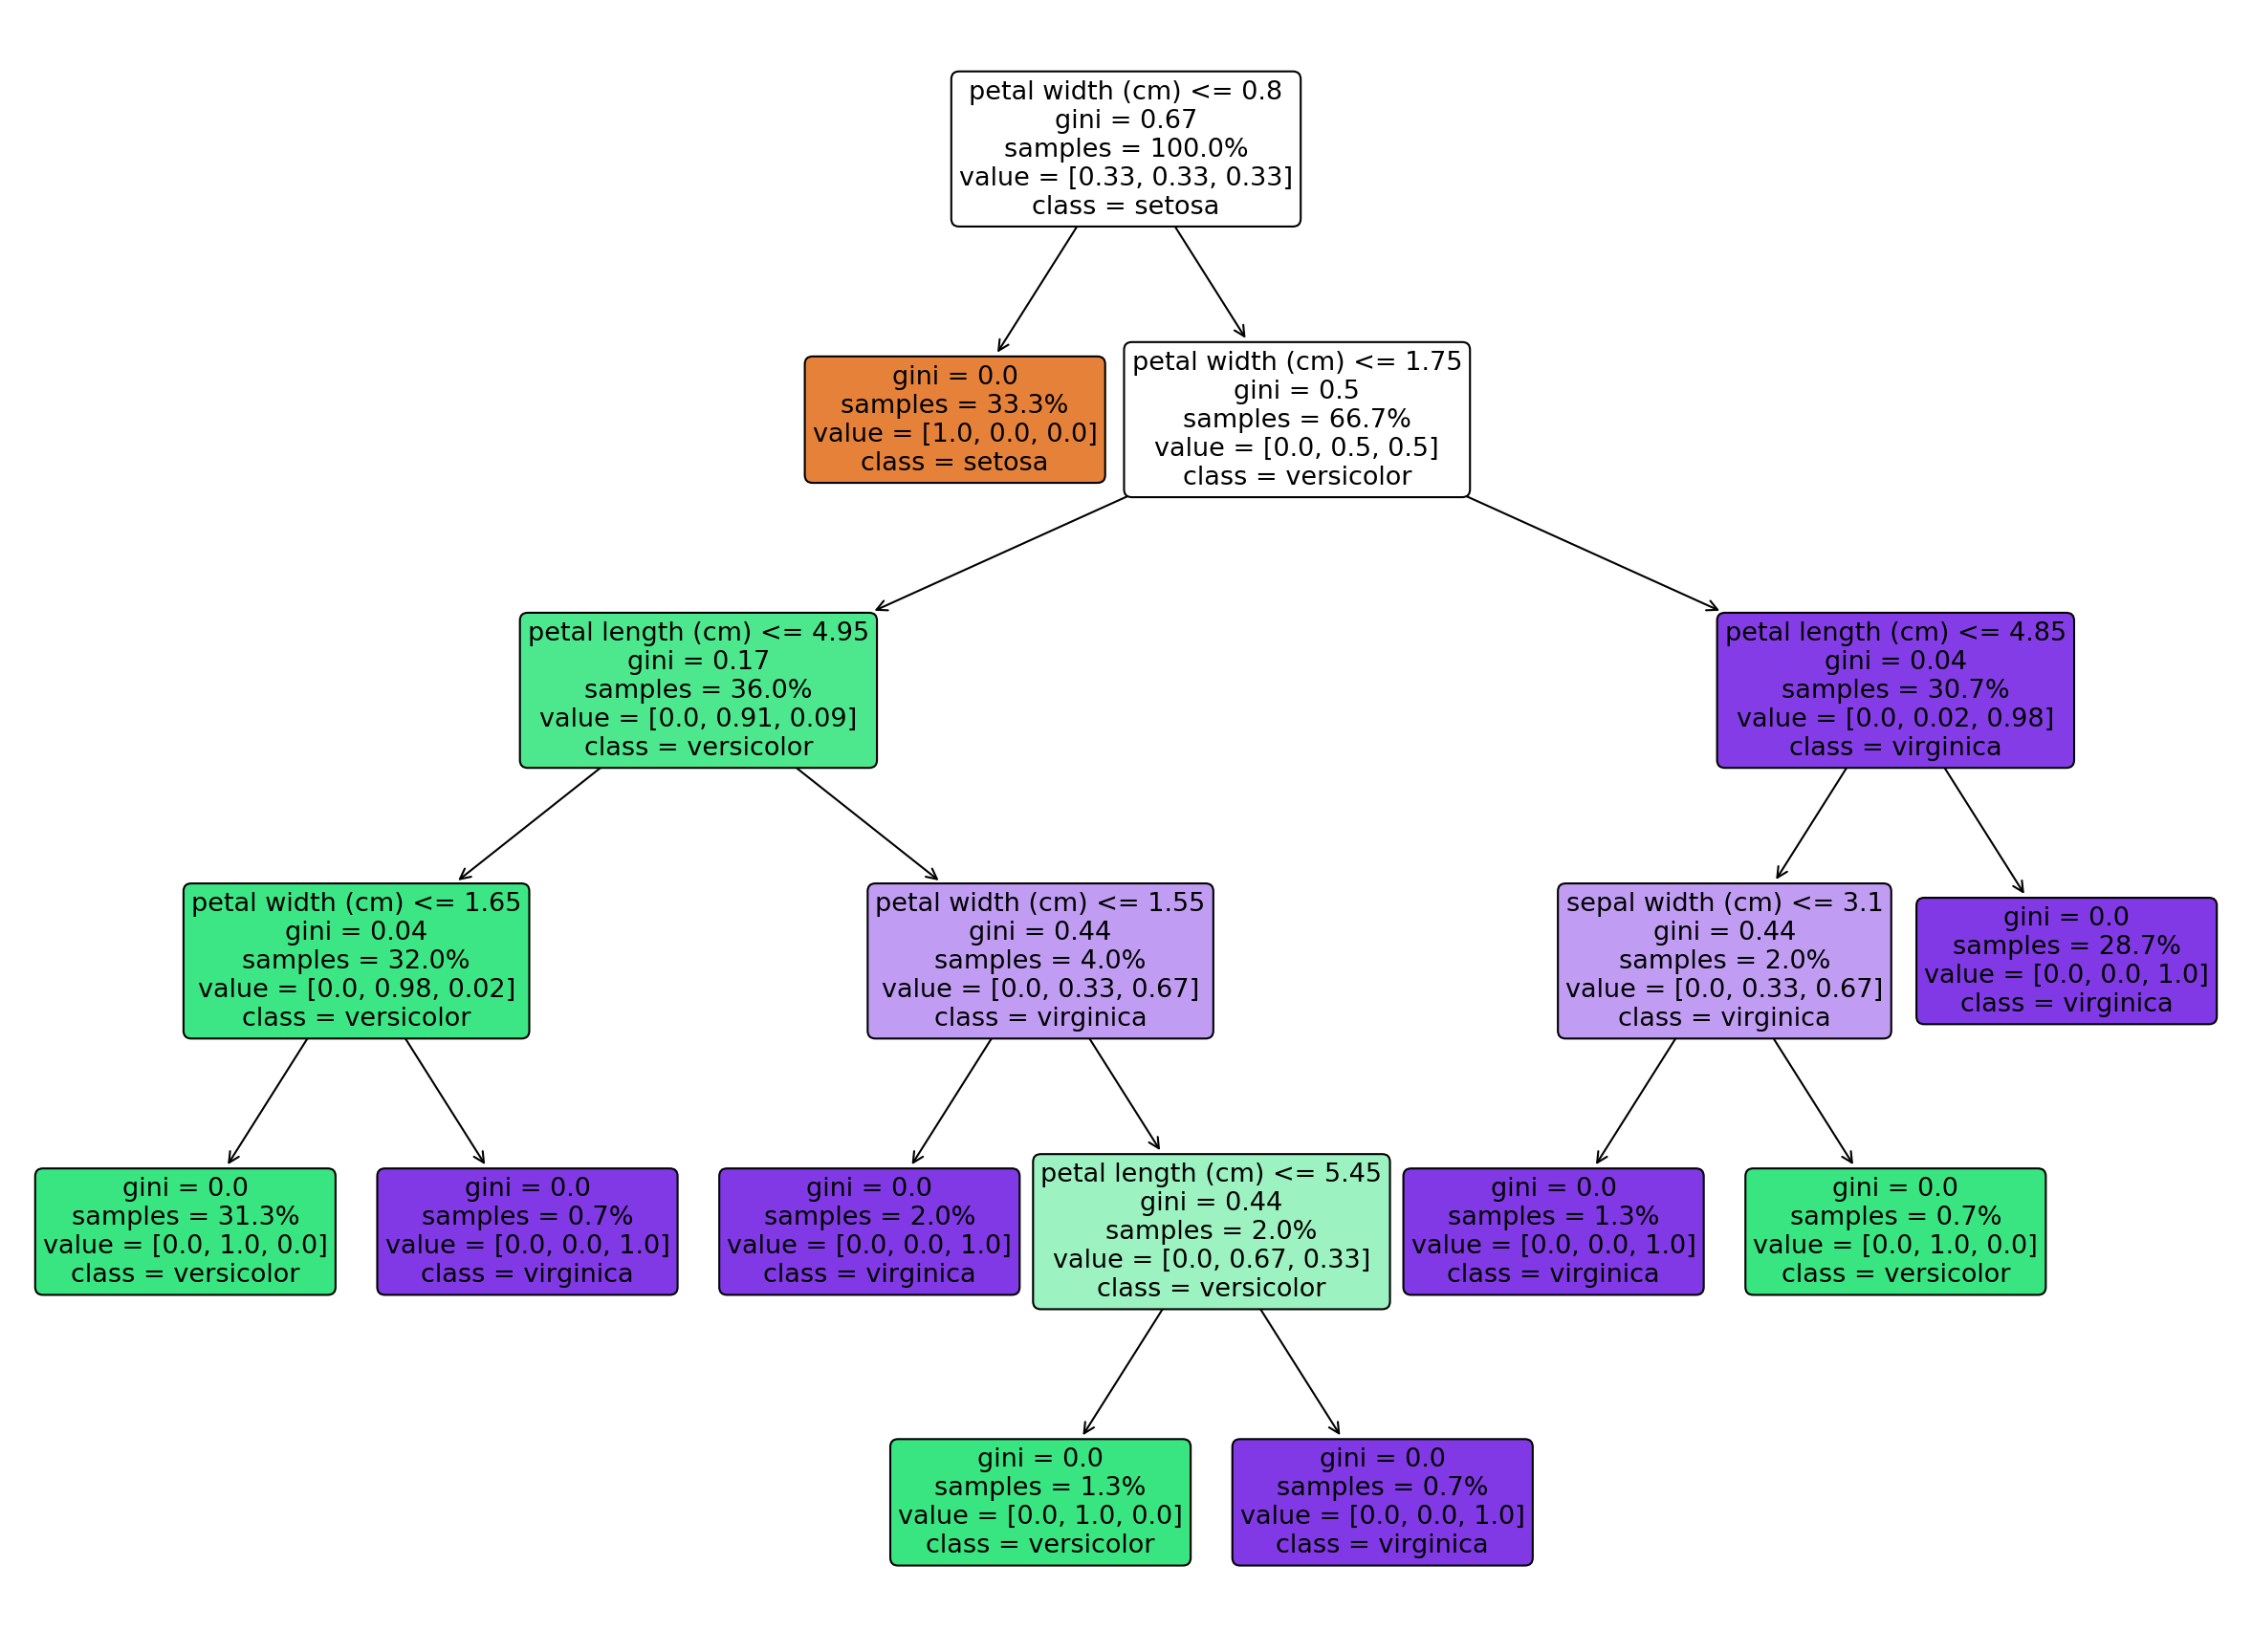

In [4]:
from sklearn import tree

plt.figure(figsize = (20,15), facecolor = 'white', dpi = 150)
dt_clf.fit(iris_df, y_expected)
tree_plt = tree.plot_tree(dt_clf, feature_names = iris.feature_names, class_names = iris.target_names, 
                          fontsize = 13, precision = 2, filled = True, proportion = True, rounded = 10)
plt.show()

### Performance Evaluation of Decision Tree Classifier

Spliting the iris data to evaluate the performance of DecisionTree Classifier with the model trained on training data and testing on the test data

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(iris_df, y_expected, random_state = 0)

In [6]:
# Training the model in the data
dt_clf_train = dt_clf.fit(x_train, y_train)

# Predicting the unseen (test) data
y_pred = dt_clf.predict(x_test)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [7]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1])

### Calculating the score of the classifier with the test data

In [8]:
dt_clf.score(x_test, y_test)

0.9736842105263158

In [9]:
from sklearn.metrics import accuracy_score

### Calculating the accuracy score of the output predicted by classifier

(the above obtained score is similar to the below difference is that the classifer predicts the values based on input in the above score calculation whereas here the already predicted values are used for accuracy testing.

In [10]:
accuracy_score(y_test, y_pred)

0.9736842105263158

The classifier model trained on the training data has seen lesser data than that of the whole data hence there could be some values that decision tree cannot classify well which are available in the test data. This is the root for the model prediction beeing less than 100%.

But this is good since the model has predicted with morethan 95% accuracy, and is acceptable.

Since the available data for the classifier during the training is comparitively lessthan the actual data, the same reduction in the classification in the visual tree can also be seen in the following decision tree plot of the classifier which is trained on the training data.

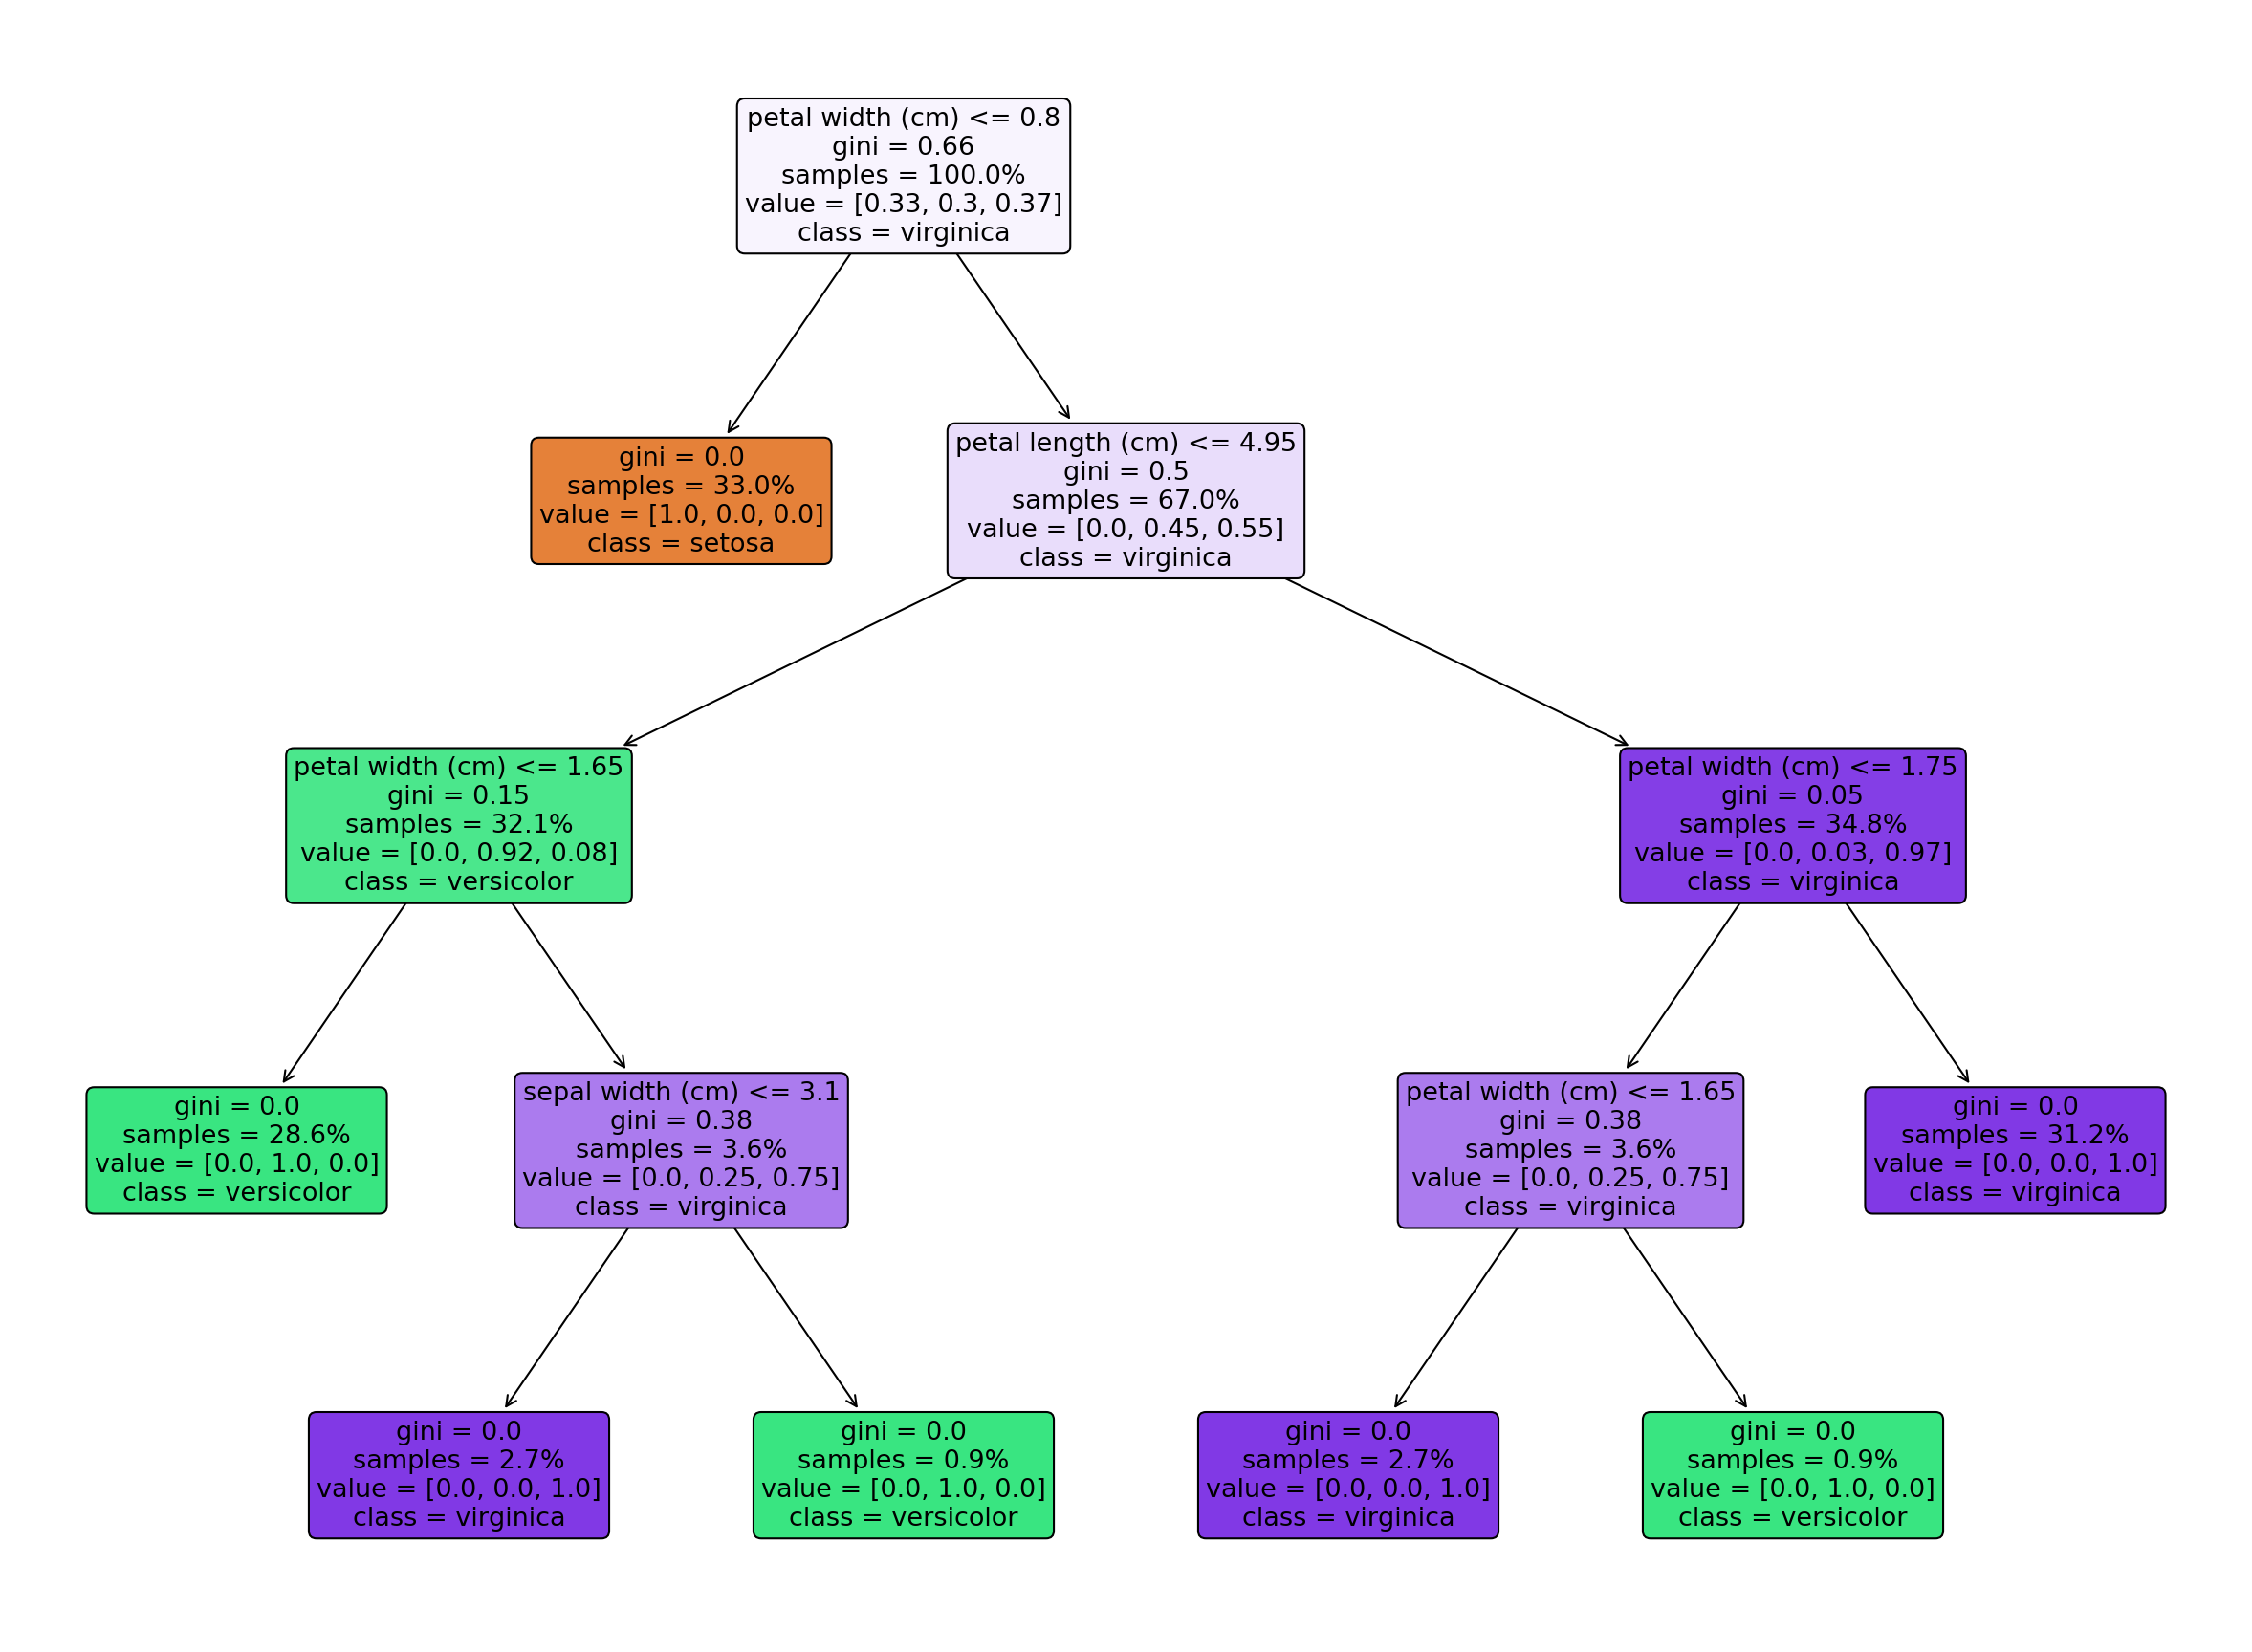

In [11]:
plt.figure(figsize = (20,15), facecolor = 'white', dpi = 150)
tree_plt = tree.plot_tree(dt_clf_train, feature_names = iris.feature_names, class_names = iris.target_names, 
                          fontsize = 13, precision = 2, filled = True, proportion = True, rounded = 10)
plt.show()